### Example Notebook for Estimation of Threshold for Nearest Neighbors
####   Daniel Trugman, 2024

In [2]:
#### Package Imports ####

# packages
using DataFrames
using CSV
using Printf
using StatSei


load_catalog_nsl (generic function with 1 method)

In [3]:
###### Script Setup #######

# run parameters (Zaliapin and Ben-Zion 2013)
bval = 1.0 # fixed here
dfrac = 1.6 # fixed here for 2D distances

# minimum magnitude to use for this analysis
minmag = 2.5

# parameters for family assignment
max_dY = 20.0 # maximum year difference for parent search (set for efficiency) 
                    # 20.0 is likely conservative, 10.0 may be fine?
max_dL = 999.0 # scale factor to multiply parent rupture dimension when checking
                    # family assignment distance window [set to large value to turn off]
max_dT = 0.0  # scale factor to multiply parent magnitude when checking 
                    # family assignment time window [ok to keep at 0.0]

0.0

In [4]:
### Load Catalog Hauksson-Shearer 2011 catalog (used in ZBZ13 paper)

qdf = load_catalog_hs2011("../data/hs_1981_2011_06_comb_K2_A.cat_so_scsn_v01.gz",minmag)

Duplicates removed, keeping: 39724/39741


Row,evid,otime,tepoch,lat,lon,dep,mag,enum
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64,Int64
1,3301609,1981-01-02T15:03:09.120,3.47296e8,36.0457,-118.275,11.62,3.13,1
2,3301616,1981-01-02T16:45:32.750,3.47302e8,36.0422,-118.276,0.03,2.59,2
3,3301639,1981-01-04T09:21:32.270,3.47448e8,32.1482,-115.782,21.19,2.77,3
4,3301757,1981-01-08T14:52:14.490,3.47814e8,33.9298,-118.681,8.59,3.2,4
5,3301824,1981-01-10T23:19:20.480,3.48017e8,36.2263,-120.175,9.31,2.81,5
6,12160219,1981-01-11T02:23:37.280,3.48028e8,36.1398,-120.058,18.84,2.98,6
7,3301833,1981-01-11T02:27:42.660,3.48028e8,36.2473,-120.152,7.26,2.62,7
8,3301835,1981-01-11T04:44:29.600,3.48036e8,36.0263,-120.713,4.87,3.49,8
9,3301836,1981-01-11T05:09:20.300,3.48038e8,37.3023,-118.853,5.6,2.53,9


In [5]:
### Use Catalog Shuffling to Estimate Threshold "Automatically"

# shuffling parameters
xy_shuffle = "random" # choose "permute" (locations fixed, times randomized) 
                       # or "random" (both space and time are randomized)
pct_shuffle = 1.0 # percentile in the nearest neighbor distribution
n_shuffle = 10 # number of shuffled catalogs, best to increase if you have time

# note, this can be made more efficient by launching with more threads...
@printf("\nShuffling data on nthreads: %d\n",Threads.nthreads())
thresh, ndf0 = get_thresh_shuffle_llt(qdf.lon,qdf.lat,qdf.tepoch,qdf.mag,
    bval,dfrac,n_shuffle, pct_shuffle, xy_shuffle)
@printf("Threshold: %.2f\n", thresh)


Shuffling data on nthreads: 1
Starting with iteration 1/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 1/10
Starting with iteration 2/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 2/10
Starting with iteration 3/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 3/10
Starting with iteration 4/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 4/10
Starting with iteration 5/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 5/10
Starting with iteration 6/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 6/10
Starting with iteration 7/10
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
Done with iteration 7/10
Sta


Plotting results:

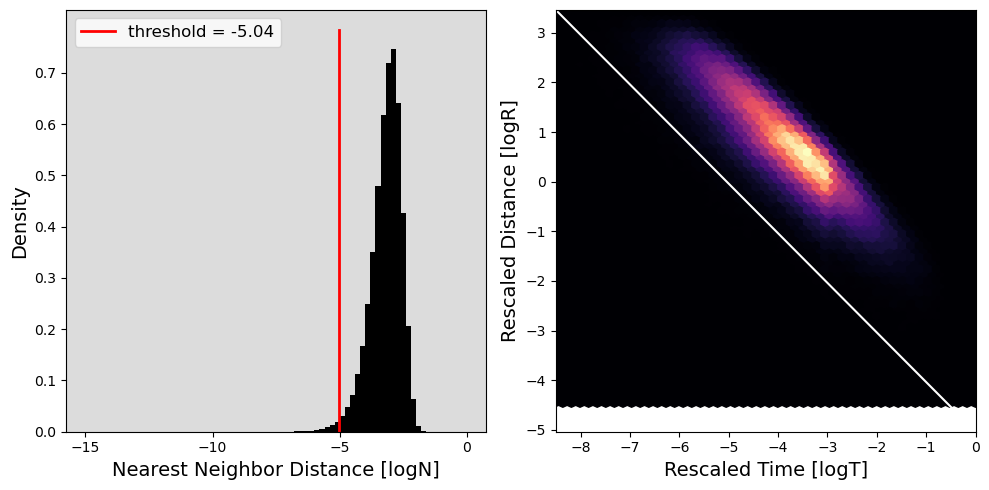

In [6]:
### Plot Results for this threshold
print("\nPlotting results:")
fig = plot_neighbors(ndf0.distR,ndf0.distT,ndf0.distN,thresh);